<a href="https://colab.research.google.com/github/aimalz/CASTORpz/blob/main/intro_plots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

prepend = '/content/drive/MyDrive/Research/CASTORpz/'

import sys
sys.path.append(prepend)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import surveys

In [3]:
import numpy as np

In [4]:
import os

In [5]:
import matplotlib.pyplot as plt

In [6]:
from astropy.table import Table
import pandas as pd

Roman, Euclid, CASTOR in microns, Rubin in angstroms?

Roman diameter 2.36m

In [7]:
filtfilenames = os.listdir(prepend+'filters')
filtfilenames

['filter_transmission_curves.zip',
 'Euclid_VIS.vis.dat',
 'Euclid_NISP.Y.dat',
 'Euclid_NISP.J.dat',
 'Euclid_NISP.H.dat',
 'CASTOR_CASTOR0.uv.dat',
 'CASTOR_CASTOR0.u.dat',
 'CASTOR_CASTOR0.g.dat',
 'LSST_LSST.u.dat',
 'LSST_LSST.g.dat',
 'LSST_LSST.r.dat',
 'LSST_LSST.i.dat',
 'LSST_LSST.z.dat',
 'LSST_LSST.y.dat',
 'Roman_WFI.F062.dat',
 'Roman_WFI.F087.dat',
 'Roman_WFI.F106.dat',
 'Roman_WFI.F129.dat',
 'Roman_WFI.F146.dat',
 'Roman_WFI.F158.dat',
 'Roman_WFI.F184.dat',
 'Roman_WFI.F213.dat']

In [8]:
survnames = ['CASTOR', 'Euclid', 'LSST', 'Roman']
survfilts = {}
for survname in survnames:
  survfilts[survname] = []
  for ffn in filtfilenames:
    if ffn.startswith(survname):
      survfilts[survname].append(ffn)

survfilts

{'CASTOR': ['CASTOR_CASTOR0.uv.dat',
  'CASTOR_CASTOR0.u.dat',
  'CASTOR_CASTOR0.g.dat'],
 'Euclid': ['Euclid_VIS.vis.dat',
  'Euclid_NISP.Y.dat',
  'Euclid_NISP.J.dat',
  'Euclid_NISP.H.dat'],
 'LSST': ['LSST_LSST.u.dat',
  'LSST_LSST.g.dat',
  'LSST_LSST.r.dat',
  'LSST_LSST.i.dat',
  'LSST_LSST.z.dat',
  'LSST_LSST.y.dat'],
 'Roman': ['Roman_WFI.F062.dat',
  'Roman_WFI.F087.dat',
  'Roman_WFI.F106.dat',
  'Roman_WFI.F129.dat',
  'Roman_WFI.F146.dat',
  'Roman_WFI.F158.dat',
  'Roman_WFI.F184.dat',
  'Roman_WFI.F213.dat']}

In [29]:
survcols = {'CASTOR': 'b', 'Euclid': 'r', 'LSST': 'g', 'Roman': 'purple'}
suvstyles = {'CASTOR': 'solid', 'Euclid': 'dotted', 'LSST': 'dashed', 'Roman': 'dashdot'}
survalpha = {'CASTOR': 0.3, 'Euclid': 0.3, 'LSST': 0.7, 'Roman': 0.3}

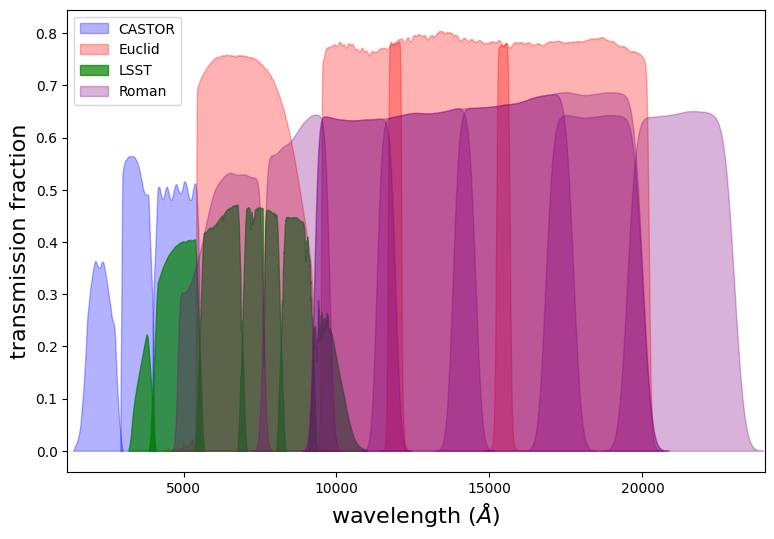

In [40]:

plt.figure(figsize=(9, 6))

for survname in survnames:
  for i, ffn in enumerate(survfilts[survname]):
    x,y = np.loadtxt(prepend+'filters/'+ffn).T
    if survname == 'Roman':
      y /= np.pi * (2.36 / 2)**2
    lab = None
    if i == 0:
      lab = survname
    # plt.plot(x,y, color=survcols[survname], label=lab, alpha = 0.6, lw = 2)
    plt.fill_between(x,y, color=survcols[survname], label=lab, alpha =survalpha[survname])
plt.legend(loc = 'upper left', fontsize = 10)
plt.xlabel(r'wavelength ($\AA$)', fontsize=16)
plt.ylabel(r'transmission fraction', fontsize = 16)
plt.xlim(1200, 24000)
plt.savefig('filtplot.pdf')

In [ ]:
unp = Table.read(prepend+"unperturbed_mags.fits").to_pandas()#.set_index('ID')
mock = Table.read(prepend+"ext_phot.fits").to_pandas()#.set_index('ID')

In [ ]:
unp.columns

Index(['ID', 'RA', 'DEC', 'ID_CLASSIC', 'photoz', 'lp_type', 'lp_NbFilt',
       'lp_zq', 'lp_model', 'lp_age', 'lp_dust', 'lp_Attenuation',
       'lp_mass_med', 'lp_mass_best', 'lp_SFR_med', 'lp_SFR_best',
       'lp_sSFR_med', 'lp_sSFR_best', 'castor_uv_MAG', 'castor_uv_MAGERR',
       'castor_u_MAG', 'castor_u_MAGERR', 'castor_g_MAG', 'castor_g_MAGERR',
       'LSST_u_MAG', 'LSST_u_MAGERR', 'LSST_g_MAG', 'LSST_g_MAGERR',
       'LSST_r_MAG', 'LSST_r_MAGERR', 'LSST_i_MAG', 'LSST_i_MAGERR',
       'LSST_z_MAG', 'LSST_z_MAGERR', 'LSST_y_MAG', 'LSST_y_MAGERR',
       'PanStarrs_g_MAG', 'PanStarrs_g_MAGERR', 'PanStarrs_r_MAG',
       'PanStarrs_r_MAGERR', 'PanStarrs_i_MAG', 'PanStarrs_i_MAGERR',
       'PanStarrs_z_MAG', 'PanStarrs_z_MAGERR', 'PanStarrs_y_MAG',
       'PanStarrs_y_MAGERR', 'Euclid_Y_MAG', 'Euclid_Y_MAGERR', 'Euclid_J_MAG',
       'Euclid_J_MAGERR', 'Euclid_H_MAG', 'Euclid_H_MAGERR', 'Euclid_VIS_MAG',
       'Euclid_VIS_MAGERR', 'Roman_062_MAG', 'Roman_062_MAGERR',
     

In [ ]:
mock.columns

Index(['ID', 'photoz', 'castor_uv_MAG', 'castor_uv_MAGERR', 'castor_u_MAG',
       'castor_u_MAGERR', 'castor_g_MAG', 'castor_g_MAGERR', 'LSST_u_MAG',
       'LSST_u_MAGERR', 'LSST_g_MAG', 'LSST_g_MAGERR', 'LSST_r_MAG',
       'LSST_r_MAGERR', 'LSST_i_MAG', 'LSST_i_MAGERR', 'LSST_z_MAG',
       'LSST_z_MAGERR', 'LSST_y_MAG', 'LSST_y_MAGERR', 'Euclid_Y_MAG',
       'Euclid_Y_MAGERR', 'Euclid_J_MAG', 'Euclid_J_MAGERR', 'Euclid_H_MAG',
       'Euclid_H_MAGERR', 'Roman_106_MAG', 'Roman_106_MAGERR', 'Roman_129_MAG',
       'Roman_129_MAGERR', 'Roman_158_MAG', 'Roman_158_MAGERR',
       'Roman_184_MAG', 'Roman_184_MAGERR', 'hlr', 'castor_uv_UNPMAG',
       'castor_u_UNPMAG', 'castor_g_UNPMAG'],
      dtype='object')

In [ ]:
len(unp)

698211

In [ ]:
len(mock)

698211

In [ ]:
mock_cat = pd.merge(mock, unp[['ID',"Euclid_VIS_MAG"]], on='ID')